# Computer Vision - P1

### **Carefully read the following instructions before start coding.**

==============================================================================================
## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments and answers need to be in **English**.

- The deliverable must be a file named **P1_Student1_Student2.zip** that includes:
    - The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): September 27, 23:00 h** 

==============================================================================================

## Practicum 1: Basics on Image Processing and Manipulation
==============================================================================================

The main topics are:

1. Image loading, saving and creation

2. Color manipulation 

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

==============================================================================================
### Packages loading 

First we need to import the required Python packages for basic image manipulation. 

Run the following code:

In [2]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the 
notebook**):

In [3]:
%matplotlib inline

==============================================================================================
### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 100 rows and 200 columns where each value should be of type unsigned integer with 8 bits. 

uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


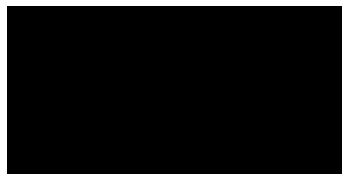

In [26]:
#Your solution
img_a = np.zeros((100, 200),dtype=np.uint8)
print(img_a.dtype)
print(img_a)
plt.axis('off')
plt.imshow(img_a,cmap='gray')

How many different values can each pixel have in this case? 

In [5]:
#255 values, with uint8, (2^8)-1;

b) Change the color of the pixels of the image in such a way that the right half is black (0) and the left half is white (255).

Visualize the image and print the values of its first row.

In [6]:
#Your solution
img_b = img_a.copy()
img_b[0:100, 0:100] = 255; 
print(img_b)

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


### 1.2 Image saving and loading

a) Use the IO image package to save the previously image:

In [7]:
#Your solution
io.imsave('1_2_a.bmp',img_b)

b) Load the saved image and visualize it. Print the dimensions, the value of pixel (20,30) and data type in order to check everything is correct

(100, 200)
255
uint8


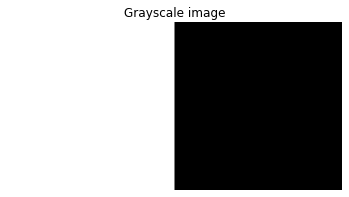

In [8]:
#Your solution
img_1_2_b = io.imread('1_2_a.bmp')
print(img_1_2_b.shape)
print(img_1_2_b[20, 30])
print(img_1_2_b.dtype)

plt.imshow(img_1_2_b, cmap='gray')
plt.axis('off')
plt.title("Grayscale image")
plt.show()

### 1.3 Color image manipulation

a) Load and show the image `images_notebook/lenna.jpg`, and check its dimensions and data type.

**Note:** Pictures may appear in the figure with pseudocolors. What commands to use in order to display them in **RGB** color and in **grayscale**?! 

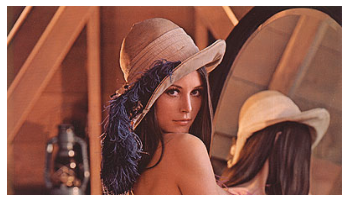

(225, 400, 3)
uint8


In [9]:
#Your solution
lenna = io.imread('images_notebook/lenna.jpg')

plt.imshow(lenna)
plt.axis('off')
plt.show()

print(lenna.shape)
print(lenna.dtype)


b) Convert the previous image to grayscale, and **save it**.

Moreover, plot the two images (RGB & greyscale) in a single figure, and show details such as shape, dtype, max and min values.

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


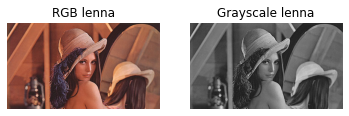

In [10]:
#Your solution
from skimage import color

lenna_grayscale = lenna.copy()
lenna_grayscale = color.rgb2gray(lenna)
io.imsave("1_3_b.bmp", lenna_grayscale)

fig, axs = plt.subplots(nrows=1,ncols=2)

ax = axs[0]
ax.imshow(lenna)
ax.axis('off')
ax.set_title('RGB lenna')

ax = axs[1]
ax.imshow(lenna_grayscale, cmap='gray')
ax.axis('off')
ax.set_title('Grayscale lenna')

plt.show()


c) Compute the mean of the previous grayscale image and use a logical operation to obtain a boolean image. Pixels greather than the mean value must be shown as white. Display the binary image.

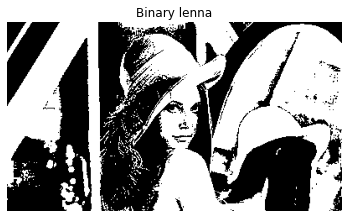

In [11]:
#Your solution
lenna_mean = lenna_grayscale.mean()
lenna_binary = lenna_grayscale > lenna_mean
plt.imshow(lenna_binary, cmap='gray')
plt.axis('off')
plt.title('Binary lenna')
plt.show()


d) Visualize in the same figure all the three images: (1) the original image, (2) the gray image, and (3) the binarized image. Set the corresponding titles of the images.

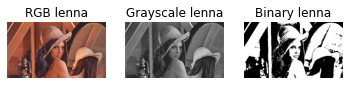

In [12]:
#Your solution
fig, axs = plt.subplots(nrows=1, ncols=3)

ax = axs[0]
ax.imshow(lenna)
ax.axis('off')
ax.set_title('RGB lenna')

ax = axs[1]
ax.imshow(lenna_grayscale, cmap='gray')
ax.axis('off')
ax.set_title('Grayscale lenna')

ax = axs[2]
ax.imshow(lenna_binary, cmap='gray')
ax.axis('off')
ax.set_title('Binary lenna')

plt.show()

### 1.4 Images manipulation

a) Create an RGB black image, 10% larger than the Lenna image. Afterwards, embed the Lenna image in the center. Show the framed image.

**Note:** Be carefull with the number of channels.

**Note:** Print the original image shape and the new image size to check if the sizes of the second one are 10% larger then the first one. 


(248, 440, 3)


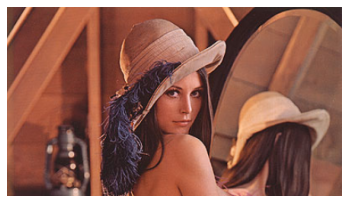

In [13]:
#Your solution
from skimage.transform import rescale
from skimage import img_as_float

rgb_black = rescale(img_as_float(lenna), 1.1, preserve_range = True) 
print(rgb_black.shape)
plt.imshow(rgb_black)
plt.axis('off')
plt.show()


b) Change the frame of the new image to green. Visualize the three images: original, black frame and green frame, in one single figure, with their respective titles.

In [14]:
#Your solution



### 1.5 Contrast enhancement

a) Open the image `images_notebook/car_lowContrast.jpg` and visualize it without graylevel enhancement. Print the image size, data type, minimum and maximum of the image. 

**Note:** When running the function `imshow()` the image is authomatically enhanced. Use the `vmin` and `vmax` parameters in order to deactivate the enhancement applied by default. To this purpose, check the data type and used the maximum and minimum value corresponding to this type.


In [15]:
#Your solution


b) Create an image called `dark_image` using the  values from the original one. Compute the minimum value of the image and substract this value of the original image. Print the new maximum a minimum values. Show the new image without graylevel enhancement.

In [16]:
#Your solution


c) Similarly to the previous question, create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and show the new image without graylevel enhancement.


In [17]:
#Your solution


d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through scikit-image command [rescale_intensity](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.rescale_intensity). Check the minimal and maximal values of the enhanced image, and compare them with the previous one. Show the two images  without graylevel enhancement.

In [18]:
#Your solution




e) Visualize the 5 images in the same figure, each one with its corresponding title.

In [19]:
#Your solution

### 1.7 Color manipulation

a) Read and visualize the image `images_notebook/sillas.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/ex17c.png">

<img src="images_notebook/ex17c2.png">

In [20]:
#Your solution


b) Construct and visualize a new image, changing the red and green channels each other (see figure).
<img src="images_notebook/sillas2.png">

In [21]:
#Your solution



### 1.6 Masks and logical image manipulation

a) Read the image `images_notebook/circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

In [22]:
#Your solution



b) Given the images `images_notebook/coat.png` and `images_notebook/model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying [resize, rotate, etc...](https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html) keep track how the image type and values range change. When necessary, apply type conversion using [img_as_float, img_as_uint, img_as_ubyte.](https://scikit-image.org/docs/stable/api/skimage.html)

**Note: DO NOT USE LOOPS to overlap the images!! It will be penalized.**


In [23]:
#Your solution
